<a href="https://colab.research.google.com/github/lucashamon1/Estudo-da-Popula-o-Brasileira/blob/main/Curso_de_Estat%C3%ADstica_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scp

In [5]:
dados = pd.read_csv('dados.csv')

In [6]:
type(dados)

pandas.core.frame.DataFrame

In [7]:
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


##**Tipos de Dados**

Variáveis Qualitativas ordinais

In [8]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Variáveis Qualitativas Nominais

In [9]:
sorted(dados['UF'].unique())

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 35,
 41,
 42,
 43,
 50,
 51,
 52,
 53]

In [10]:
sorted(dados['Sexo'].unique())

[0, 1]

In [11]:
sorted(dados['Cor'].unique())

[0, 2, 4, 6, 8]

Variáveis Quantitativas Discretas

In [12]:
dados['Idade']

0        23
1        23
2        35
3        46
4        47
         ..
76835    46
76836    30
76837    32
76838    57
76839    38
Name: Idade, Length: 76840, dtype: int64

In [13]:
dados.Idade.min()

13

In [14]:
dados.Idade.max()

99

Variáveis Quantitativas Continuas

In [15]:
dados['Altura']

0        1.603808
1        1.739790
2        1.760444
3        1.783158
4        1.690631
           ...   
76835    1.687030
76836    1.792934
76837    1.830587
76838    1.726344
76839    1.658305
Name: Altura, Length: 76840, dtype: float64

In [16]:
dados.Altura.min()

1.339244614

In [17]:
dados.Altura.max()

2.028496765

##**Distribuição de Frequências**

In [18]:
frequencia = dados['Sexo'].value_counts()

In [19]:
percentual = dados['Sexo'].value_counts(normalize = True) *100

In [20]:
dist_freq_qualitativas = pd.DataFrame({'frequencia': frequencia, 'percentual(%)': percentual}) 

In [21]:
dist_freq_qualitativas.rename(index={0: 'Masculino', 1: 'Feminino'}, inplace = True)

In [22]:
dist_freq_qualitativas

,frequencia,percentual(%)
Masculino,53250,69.299844
Feminino,23590,30.700156


In [23]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [24]:
frequencia_2 = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia_2.rename(index= sexo, inplace=True)
frequencia_2.rename(columns= cor, inplace=True)
frequencia_2

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [25]:
percentual = pd.crosstab(dados.Sexo,
                        dados.Cor,
                        normalize = True) * 100
percentual.rename(index= sexo, inplace = True)
percentual.rename(columns= cor, inplace= True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [26]:
dados.Renda.min()

0

In [27]:
dados.Renda.max()

200000

In [28]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [29]:
labels = ['E', 'D', 'C', 'B', 'A']

In [30]:
percentual = pd.value_counts(
    pd.cut(x= dados.Renda,
          bins = classes,
          labels= labels,
          include_lowest = True),
    normalize = True
)
percentual

E    0.647514
D    0.217335
C    0.098894
B    0.028345
A    0.007913
Name: Renda, dtype: float64

In [31]:
frequencia = pd.value_counts(
    pd.cut(x= dados.Renda,
          bins = classes,
          labels= labels,
          include_lowest = True)
)
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [32]:
dist_freq_qualitativas_personalizadas =pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_qualitativas_personalizadas

,Frequência,Porcentagem(%)
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


In [33]:
dist_freq_qualitativas_personalizadas.sort_index(ascending=False)

,Frequência,Porcentagem(%)
A,608,0.007913
B,2178,0.028345
C,7599,0.098894
D,16700,0.217335
E,49755,0.647514


##**Histograma**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


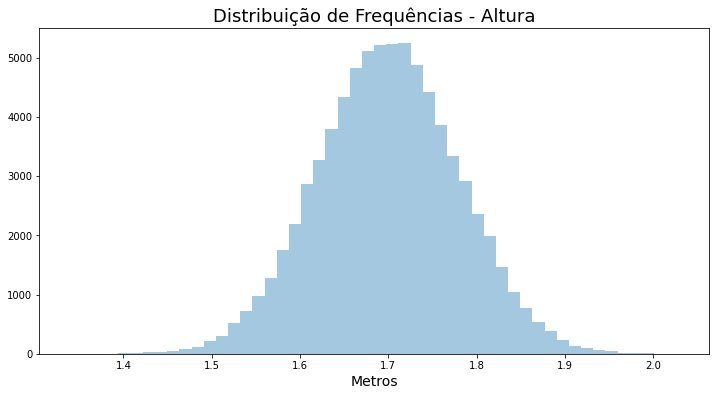

In [34]:
ax = sns.distplot(dados.Altura, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


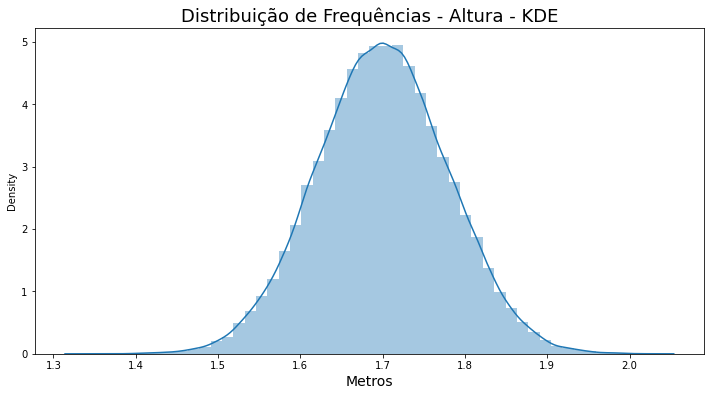

In [35]:
ax = sns.distplot(dados.Altura, )

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

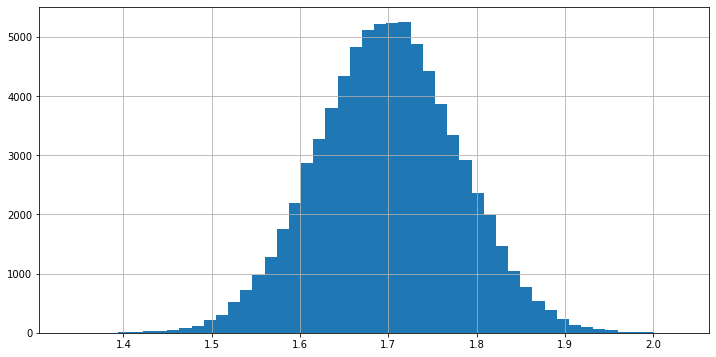

In [36]:
dados.Altura.hist(bins = 50, figsize = (12,6))

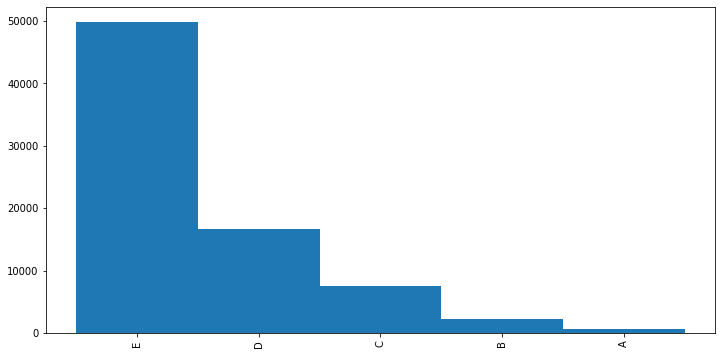

In [37]:
dist_freq_qualitativas_personalizadas['Frequência'].plot.bar(width = 1, figsize= (12,6))

##**Medidas de Tendência Central**

##Média

In [38]:
dados.Renda.mean()

2000.3831988547631

In [39]:
dados.groupby(['Sexo'])['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

In [40]:
dados.Idade.mean()

44.07142113482561

In [41]:
dados.groupby(['Sexo'])['Idade'].mean()

Sexo
0    44.046554
1    44.127554
Name: Idade, dtype: float64

In [42]:
dados.Altura.mean()

1.6995124540575814

In [43]:
dados.groupby(['Sexo'])['Idade'].mean()

Sexo
0    44.046554
1    44.127554
Name: Idade, dtype: float64

##Mediana

In [44]:
dados.Renda.median()

1200.0

In [45]:
dados.groupby(['Sexo'])['Renda'].median()

Sexo
0    1350
1     900
Name: Renda, dtype: int64

In [46]:
dados.Idade.median()

43.0

In [47]:
dados.groupby(['Sexo'])['Idade'].median()

Sexo
0    43
1    44
Name: Idade, dtype: int64

In [48]:
dados.Altura.median()

1.6993247325

In [49]:
dados.groupby(['Sexo'])['Altura'].median()

Sexo
0    1.699249
1    1.699573
Name: Altura, dtype: float64

##Moda

In [50]:
dados.Renda.mode()

0    788
dtype: int64

In [51]:
dados.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [52]:
dados.Idade.mode()

0    40
dtype: int64

##Relação entre as medidas centrais

##Renda

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


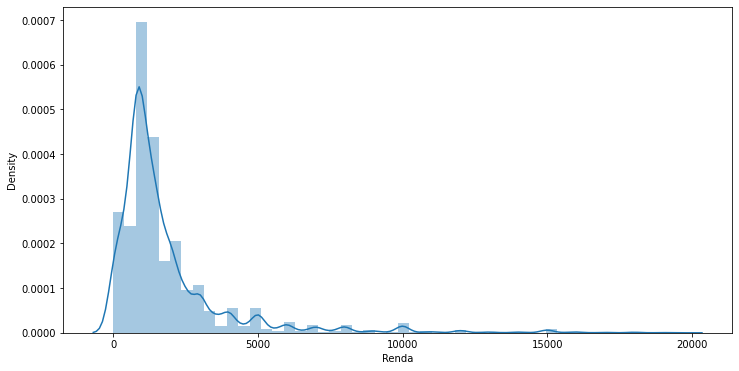

In [53]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12, 6)
ax

In [54]:
dados.Renda.mode()

0    788
dtype: int64

In [55]:
dados.Renda.median()

1200.0

In [56]:
dados.Renda.mean()

2000.3831988547631

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


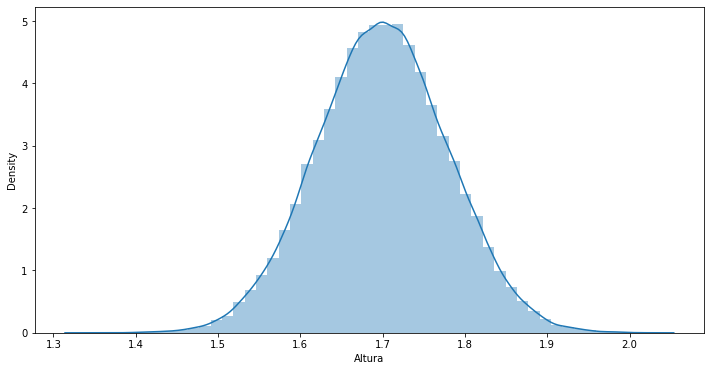

In [57]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax

In [58]:
dados.Altura.mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

In [59]:
dados.Altura.median()

1.6993247325

In [60]:
dados.Altura.mean()

1.6995124540575814

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


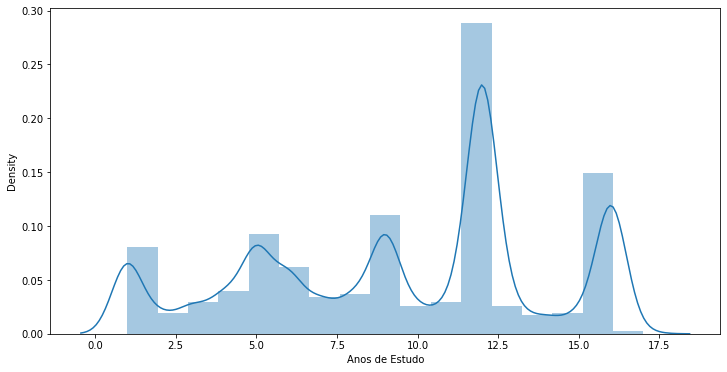

In [61]:
ax = sns.distplot(dados['Anos de Estudo'], bins = 17)
ax.figure.set_size_inches(12, 6)
ax

In [62]:
dados['Anos de Estudo'].mode()

0    12
dtype: int64

In [63]:
dados['Anos de Estudo'].median()

11.0

In [64]:
dados['Anos de Estudo'].mean()

9.469664237376367

##**Medidas  Separatrizes**

In [65]:
dados.Renda.quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [66]:
dados.Renda.quantile([i / 10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [67]:
dados.Renda.quantile([i / 100 for i in range(1, 99)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.94     5400.0
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
Name: Renda, Length: 98, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


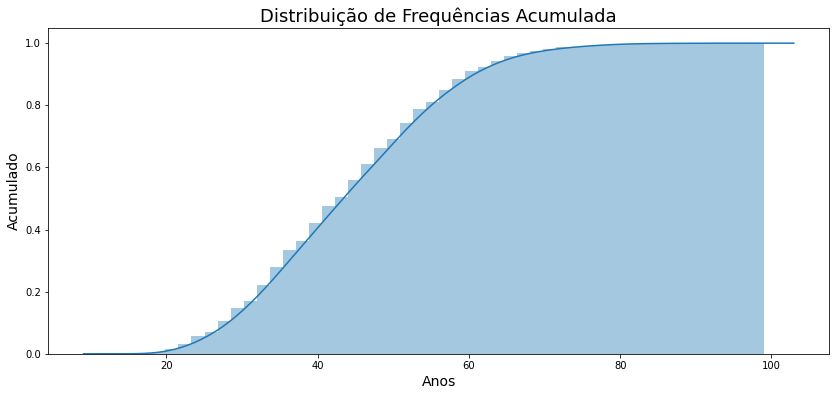

In [68]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

In [69]:
dados.Idade.quantile([i / 10 for i in range(1, 10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


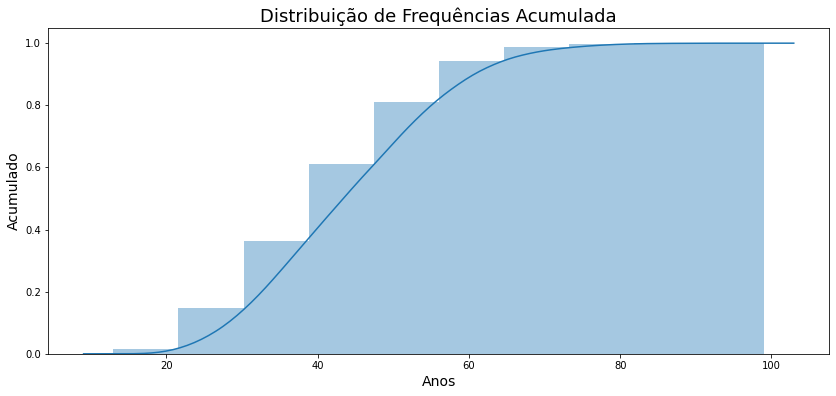

In [70]:
ax = sns.distplot(dados.Idade,
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True},
                  bins = 10)
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax

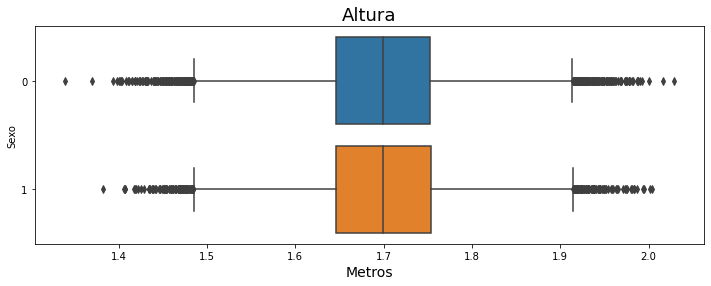

In [71]:
ax = sns.boxplot(x = 'Altura', y ='Sexo', data=dados, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Altura', fontsize = 18)
ax.set_xlabel('Metros', fontsize = 14)
ax

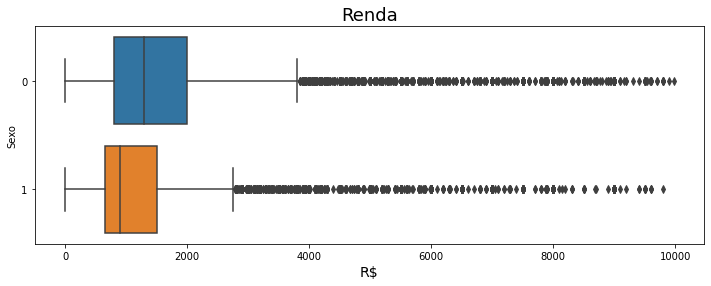

In [72]:
ax = sns.boxplot(x = 'Renda', y ='Sexo', data=dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Renda', fontsize = 18)
ax.set_xlabel('R$', fontsize = 14)
ax

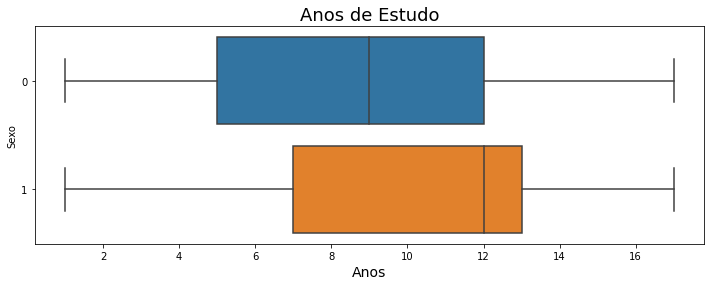

In [73]:
ax = sns.boxplot(x = 'Anos de Estudo', y ='Sexo', data=dados, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Anos de Estudo', fontsize = 18)
ax.set_xlabel('Anos', fontsize = 14)
ax

##**Distribuição Binomial**

In [74]:
from scipy.special import comb

In [75]:
combinações = comb(60, 6)
combinações

50063860.0

In [76]:
probabilidade = 1/combinações
print('%0.15f'% probabilidade)

0.000000019974489


In [77]:
combinações_2 = comb(25,20)
combinações_2

53130.0

In [78]:
probabilidade_2 = 1/ combinações_2
probabilidade_2

1.8821757952192734e-05

In [79]:
from scipy.stats import  binom

In [80]:
p = 0.22
n = 150
k = 100
a = binom.pmf (k,n,p)
print('%0.8f' % a)

0.00000000


##**Teste de Hipótese**

In [81]:
from scipy.stats import normaltest

In [82]:
significancia = 0.05

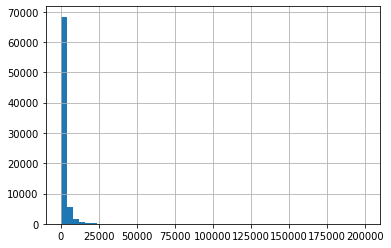

In [83]:
dados.Renda.hist(bins=50)

In [84]:
normaltest(dados.Renda)

NormaltestResult(statistic=152380.75803960307, pvalue=0.0)

In [85]:
stat_test, p_valor = normaltest(dados.Renda)
print(stat_test)
print(p_valor)

152380.75803960307
0.0


In [86]:
p_valor <= significancia

True

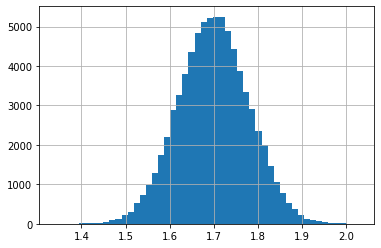

In [87]:
dados.Altura.hist(bins=50)

In [88]:
stat_test, p_valor = normaltest(dados.Altura)
print(stat_test)
print(p_valor)

0.19973093957002253
0.9049591541967501


In [89]:
p_valor<= significancia

False